In [1]:
import pandas as pd
import numpy as np
# plotting
import seaborn as sns
import matplotlib.pyplot as plt

# Modelling
from sklearn.model_selection import train_test_split 
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import plot_tree
from sklearn.metrics import accuracy_score 
from sklearn.metrics import classification_report, confusion_matrix
from sklearn import tree
# import graphviz
# Scaling with Minmax-scaler
from sklearn.preprocessing import MinMaxScaler

# from ydata_profiling import ProfileReport

# import custom functions
from custom_functions import our_metrics

pd.set_option('display.max_rows', 10)

In [2]:
# plot settings

# custom color palette: 
colors = ['#365b6d', '#41c1ba', '#289dd2', '#6c9286', '#f2f1ec', '#fa9939']
#365b6d - dark blue
#41c1ba - turquoise
#289dd2 - medium blue
#6c9286 - muddy green
#fa9939 - orange 
#f2f1ec - off-white

# Set your custom color palette

sns.set(style="white", rc={"axes.facecolor": "#f2f1ec", "figure.facecolor": "#f2f1ec"}) 
custom_palette = sns.set_palette(sns.color_palette(colors))
sns.set_palette(sns.color_palette(colors))
#sns.set_style("darkgrid")

# for multiple plots
# sns.despine(left=True, bottom=True)

In [3]:
#import the data
df = pd.read_csv("../data/petfinder-adoption-prediction/eda/df_eda.csv")
df_combined = df.copy()
df_combined.adoptionspeed = df_combined.adoptionspeed.replace([1,2,3,4],['adopted', 'adopted','adopted','not adopted'])

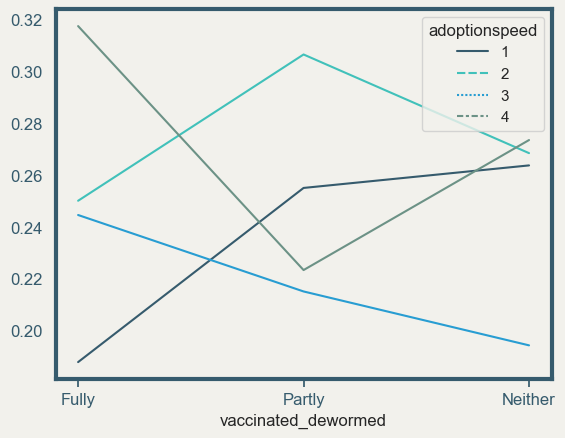

In [75]:
dew = sns.lineplot(data=pd.crosstab(df["vaccinated_dewormed"],df['adoptionspeed'],normalize="index"))
for i in range(0,4):
    dew.lines[i].set_linestyle("-")
x_labels = ['Fully', 'Partly', 'Neither']
plt.yticks(color='#365b6d', fontsize=12)
plt.xticks(ticks=np.linspace(0,2,3),labels=x_labels,color='#365b6d',fontsize=12)
plt.tick_params(axis="x", bottom=True, colors='#365b6d')
dew.spines['top'].set_visible(True)
dew.spines['top'].set_linewidth(3)
dew.spines['top'].set_color('#365b6d')  

dew.spines['right'].set_visible(True)
dew.spines['right'].set_linewidth(3)
dew.spines['right'].set_color('#365b6d')  

dew.spines['bottom'].set_linewidth(3)
dew.spines['bottom'].set_color('#365b6d')  

dew.spines['left'].set_linewidth(3)
dew.spines['left'].set_color('#365b6d') 
plt.show();

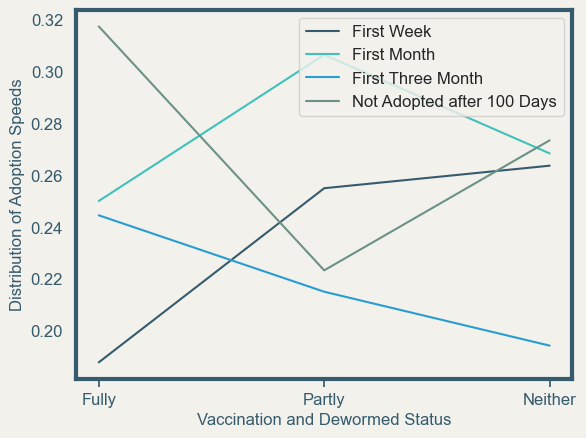

In [66]:
#percentages of different adoption speeds for vacc_dew categories
#fig = plt.figure(figsize=(12,8))
dew = pd.crosstab(df["vaccinated_dewormed"],df['adoptionspeed'],normalize="index").plot.line()
plt.legend(
#    title='Adoption Speed',
    labels = ['First Week','First Month','First Three Month','Not Adopted after 100 Days'],# ['Adopted', 'Not Adopted after 100 Days'],
    fontsize=12,#'x-large',
#    title_fontsize=20#'xx-large'
    )
plt.xlabel('Vaccination and Dewormed Status', color='#365b6d', fontsize=12);
plt.ylabel('Distribution of Adoption Speeds', fontsize=12, color='#365b6d');
# #plt.title(' Model', fontsize=28, color='#365b6d', pad=60, y=0.91) 
x_labels = ['Fully', 'Partly', 'Neither']
plt.yticks(color='#365b6d', fontsize=12)
plt.xticks(ticks=np.linspace(0,2,3),labels=x_labels,color='#365b6d',fontsize=12)
plt.tick_params(axis="x", bottom=True, colors='#365b6d')
dew.spines['top'].set_visible(True)
dew.spines['top'].set_linewidth(3)
dew.spines['top'].set_color('#365b6d')  

dew.spines['right'].set_visible(True)
dew.spines['right'].set_linewidth(3)
dew.spines['right'].set_color('#365b6d')  

dew.spines['bottom'].set_linewidth(3)
dew.spines['bottom'].set_color('#365b6d')  

dew.spines['left'].set_linewidth(3)
dew.spines['left'].set_color('#365b6d') 
plt.show();

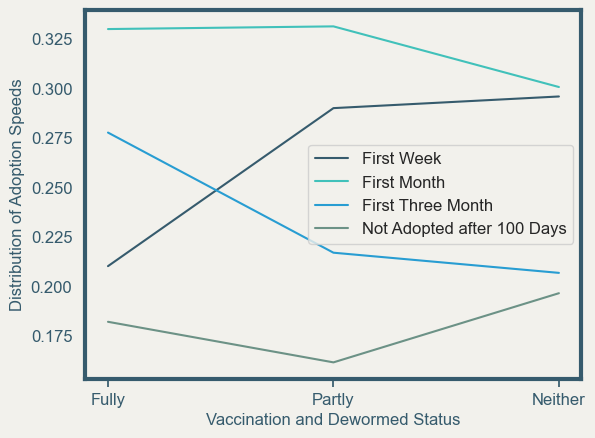

In [85]:
#percentages of different adoption speeds for vacc_dew categories
#fig = plt.figure(figsize=(12,8))
dew = pd.crosstab(df.query('age_bin==0')["vaccinated_dewormed"],df.query('age_bin==0')['adoptionspeed'],normalize="index").plot.line()
plt.legend(
#    title='Adoption Speed',
    labels = ['First Week','First Month','First Three Month','Not Adopted after 100 Days'],# ['Adopted', 'Not Adopted after 100 Days'],
    fontsize=12,#'x-large',
#    title_fontsize=20#'xx-large'
    )
plt.xlabel('Vaccination and Dewormed Status', color='#365b6d', fontsize=12);
plt.ylabel('Distribution of Adoption Speeds', fontsize=12, color='#365b6d');
# #plt.title(' Model', fontsize=28, color='#365b6d', pad=60, y=0.91) 
x_labels = ['Fully', 'Partly', 'Neither']
plt.yticks(color='#365b6d', fontsize=12)
plt.xticks(ticks=np.linspace(0,2,3),labels=x_labels,color='#365b6d',fontsize=12)
plt.tick_params(axis="x", bottom=True, colors='#365b6d')
dew.spines['top'].set_visible(True)
dew.spines['top'].set_linewidth(3)
dew.spines['top'].set_color('#365b6d')  

dew.spines['right'].set_visible(True)
dew.spines['right'].set_linewidth(3)
dew.spines['right'].set_color('#365b6d')  

dew.spines['bottom'].set_linewidth(3)
dew.spines['bottom'].set_color('#365b6d')  

dew.spines['left'].set_linewidth(3)
dew.spines['left'].set_color('#365b6d') 
plt.show();

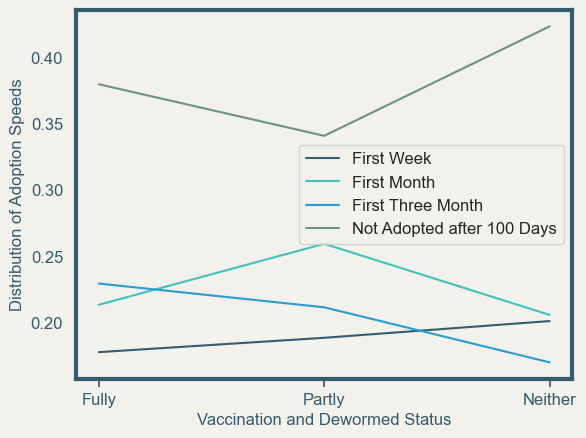

In [87]:
#percentages of different adoption speeds for vacc_dew categories
#fig = plt.figure(figsize=(12,8))
dew = pd.crosstab(df.query('age_bin!=0')["vaccinated_dewormed"],df.query('age_bin!=0')['adoptionspeed'],normalize="index").plot.line()
plt.legend(
#    title='Adoption Speed',
    labels = ['First Week','First Month','First Three Month','Not Adopted after 100 Days'],# ['Adopted', 'Not Adopted after 100 Days'],
    fontsize=12,#'x-large',
#    title_fontsize=20#'xx-large'
    )
plt.xlabel('Vaccination and Dewormed Status', color='#365b6d', fontsize=12);
plt.ylabel('Distribution of Adoption Speeds', fontsize=12, color='#365b6d');
# #plt.title(' Model', fontsize=28, color='#365b6d', pad=60, y=0.91) 
x_labels = ['Fully', 'Partly', 'Neither']
plt.yticks(color='#365b6d', fontsize=12)
plt.xticks(ticks=np.linspace(0,2,3),labels=x_labels,color='#365b6d',fontsize=12)
plt.tick_params(axis="x", bottom=True, colors='#365b6d')
dew.spines['top'].set_visible(True)
dew.spines['top'].set_linewidth(3)
dew.spines['top'].set_color('#365b6d')  

dew.spines['right'].set_visible(True)
dew.spines['right'].set_linewidth(3)
dew.spines['right'].set_color('#365b6d')  

dew.spines['bottom'].set_linewidth(3)
dew.spines['bottom'].set_color('#365b6d')  

dew.spines['left'].set_linewidth(3)
dew.spines['left'].set_color('#365b6d') 
plt.show();

In [ ]:
# three categories: fully vaccinated and dewormed (0), either only vaccinated or dewormed (1), and neither vaccinated or dewormed (2) 

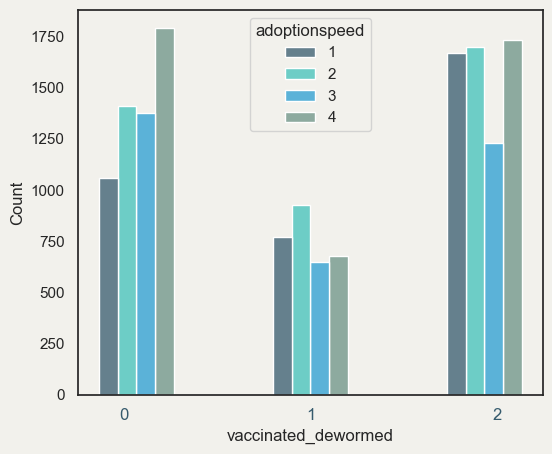

In [18]:
# histplot
#bbox = dict(boxstyle="round", fc='#41c1ba')#fc="0.8")
fig = plt.figure(figsize=(6,5))
hist = sns.histplot(data=df, x='vaccinated_dewormed', hue='adoptionspeed', palette=['#365b6d', '#41c1ba', '#289dd2', '#6c9286'], multiple='dodge', shrink=3)#, palette=custom_palette, 
#, shrink=1, bins=20 )#bins = np.arange(quantile_idx-84, 1114, 28))# bins=60)#)
#multiple='stack',“layer”, “dodge”, “fill”}
#hist.axvline(x=quantile_idx, color='#671f47', linewidth=2) # '#b86a44', '#671f47', '#a22e54',  '#dabc66'
#plt.xticks(rotation=45)
#plt.subplots_adjust(top=0.90)
#add legend to plot
# plt.legend(
# #    title='Adoption Speed',
#     labels = ['Not Adopted after 100 Days','First Three Month','First Month','First Week'],
#     fontsize=18,#'x-large',
#     labelcolor="#365b6d",#'linecolor'
#     title_fontsize=20#'xx-large',
#     #leg._legend_title_box._text.set_color('#FFFFFF')
#     )
# plt.xlabel('Amount of Photos in Listing', fontsize=20, color='#365b6d');
# plt.ylabel('Count', fontsize=20, color='#365b6d');
# #plt.title('Adoption Speed', fontsize=28, color='#365b6d', pad=60, y=0.91) 
plt.xticks(ticks=np.linspace(0,2,3),color='#365b6d',fontsize=12)
# plt.yticks(color='#365b6d', fontsize=16)
# #sns.lineplot(x=3.5, y=[0,1050],color='#365b6d',marker='o',linestyle='dashed', linewidth=2, markersize=8)
# hist.axvline(x=3.52, ymin=0, ymax=1070, linewidth=3.5, linestyle='dashed')
# # Annotate vline
# plt.annotate("'Not Adopted' most frequent for up to 3 photos", xy=(3.7, 1000), bbox=bbox, fontsize=16)
# plt.annotate("'Fast Adoption Speeds' most frequent for more than 3 photos", xy=(3.7, 800), bbox=bbox, fontsize=16)
# plt.xlim([-0.5, 16.5])
# plt.savefig('../images/presentation/photoamt.jpg')
plt.show();

/var/folders/xc/hzxkdm6x30g7x6m188q7h66h0000gn/T/ipykernel_81139/3623079933.py:4: UserWarning: The palette list has more values (4) than needed (3), which may not be intended.
  hist = sns.histplot(data=df, x='adoptionspeed', hue='vaccinated_dewormed', palette=['#365b6d', '#41c1ba', '#289dd2', '#6c9286'], multiple='dodge', shrink=3)#, palette=custom_palette,


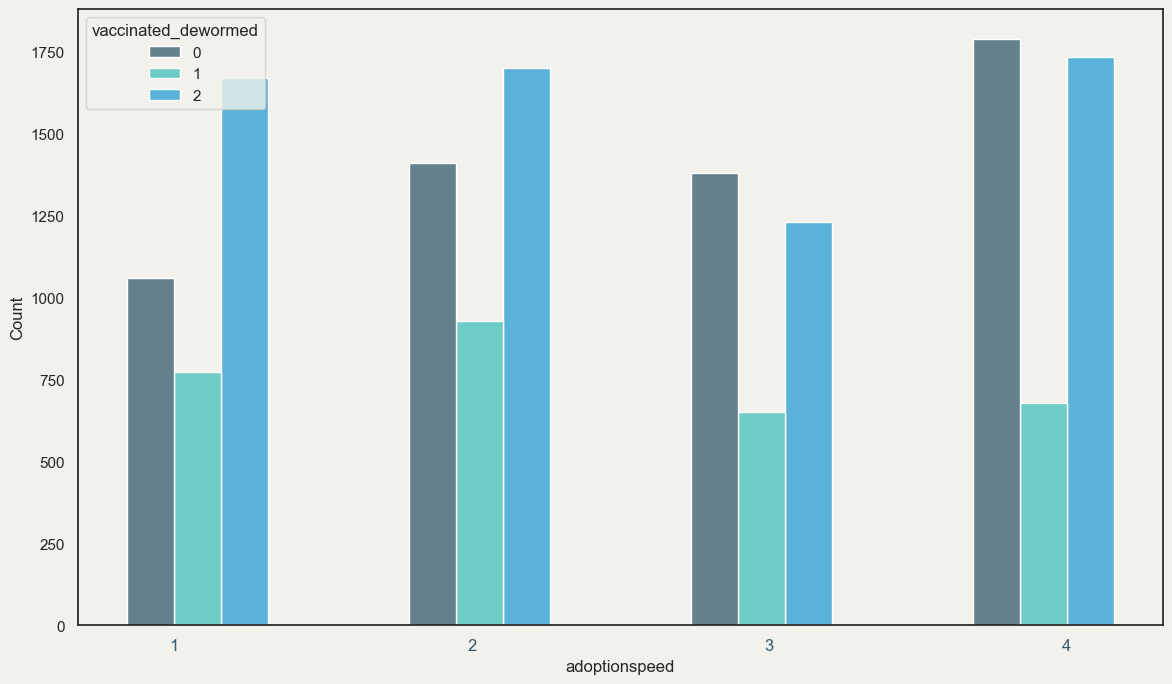

In [24]:
# histplot
#bbox = dict(boxstyle="round", fc='#41c1ba')#fc="0.8")
fig = plt.figure(figsize=(14,8))
hist = sns.histplot(data=df, x='adoptionspeed', hue='vaccinated_dewormed', palette=['#365b6d', '#41c1ba', '#289dd2', '#6c9286'], multiple='dodge', shrink=3)#, palette=custom_palette, 
#, shrink=1, bins=20 )#bins = np.arange(quantile_idx-84, 1114, 28))# bins=60)#)
#multiple='stack',“layer”, “dodge”, “fill”}
#hist.axvline(x=quantile_idx, color='#671f47', linewidth=2) # '#b86a44', '#671f47', '#a22e54',  '#dabc66'
#plt.xticks(rotation=45)
#plt.subplots_adjust(top=0.90)
#add legend to plot
# plt.legend(
# #    title='Adoption Speed',
#     labels = ['Not Adopted after 100 Days','First Three Month','First Month','First Week'],
#     fontsize=18,#'x-large',
#     labelcolor="#365b6d",#'linecolor'
#     title_fontsize=20#'xx-large',
#     #leg._legend_title_box._text.set_color('#FFFFFF')
#     )
# plt.xlabel('Amount of Photos in Listing', fontsize=20, color='#365b6d');
# plt.ylabel('Count', fontsize=20, color='#365b6d');
# #plt.title('Adoption Speed', fontsize=28, color='#365b6d', pad=60, y=0.91) 
plt.xticks(ticks=np.linspace(1,4,4),color='#365b6d',fontsize=12)
# plt.yticks(color='#365b6d', fontsize=16)
# #sns.lineplot(x=3.5, y=[0,1050],color='#365b6d',marker='o',linestyle='dashed', linewidth=2, markersize=8)
# hist.axvline(x=3.52, ymin=0, ymax=1070, linewidth=3.5, linestyle='dashed')
# # Annotate vline
# plt.annotate("'Not Adopted' most frequent for up to 3 photos", xy=(3.7, 1000), bbox=bbox, fontsize=16)
# plt.annotate("'Fast Adoption Speeds' most frequent for more than 3 photos", xy=(3.7, 800), bbox=bbox, fontsize=16)
# plt.xlim([-0.5, 16.5])
# plt.savefig('../images/presentation/photoamt.jpg')
plt.show();

<Axes: xlabel='color_pattern'>

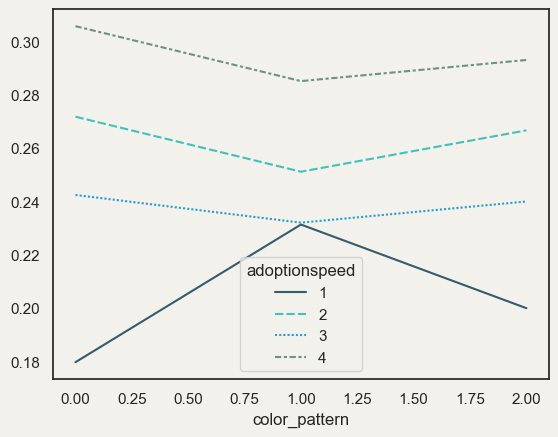

In [84]:
sns.lineplot(data=pd.crosstab(df.query('type==0')["color_pattern"],df.query('type==0')['adoptionspeed'],normalize="index"))

In [92]:
pd.crosstab(df["adoptionspeed"],df['age_bin'],normalize="columns")

age_bin,0,1,2,3
adoptionspeed,,,,
1,0.275277,0.177506,0.203733,0.159091
2,0.314889,0.227988,0.196982,0.250000
3,0.225226,0.213665,0.196187,0.242424
4,0.184608,0.380841,0.403098,0.348485


<Axes: xlabel='adoptionspeed'>

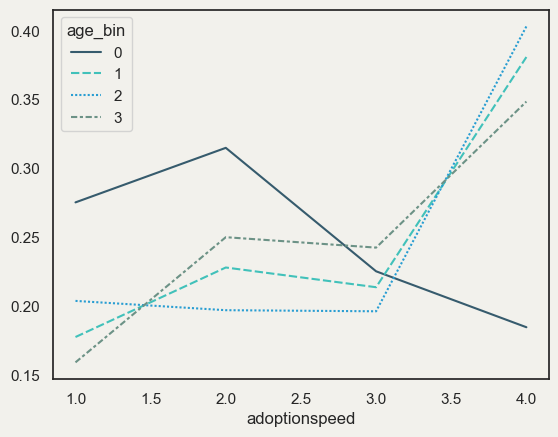

In [93]:
sns.lineplot(data=pd.crosstab(df["adoptionspeed"],df['age_bin'],normalize="columns"))

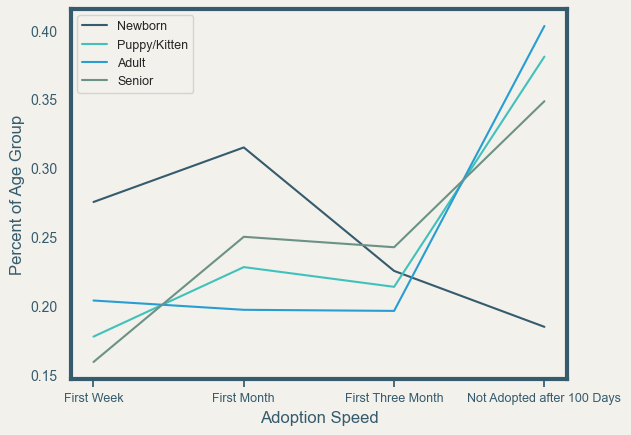

In [114]:
#percentages of different adoption speeds for age_bins
#fig = plt.figure(figsize=(20,8))
age_plot = pd.crosstab(df["adoptionspeed"],df['age_bin'],normalize="columns").plot.line()
plt.legend(
#    title='Adoption Speed',
    labels = ['Newborn', 'Puppy/Kitten', 'Adult', 'Senior'],
    fontsize=9,#'x-large',
#    title_fontsize=20#'xx-large'
    )
plt.xlabel('Adoption Speed', color='#365b6d', fontsize=12);
plt.ylabel('Percent of Age Group', fontsize=12, color='#365b6d');
# #plt.title(' Model', fontsize=28, color='#365b6d', pad=60, y=0.91) 
x_labels = ['First Week','First Month','First Three Month','Not Adopted after 100 Days']
plt.yticks(color='#365b6d', fontsize=10)
plt.xticks(ticks=np.linspace(1,4,4),labels=x_labels,color='#365b6d',fontsize=9)
plt.tick_params(axis="x", bottom=True, colors='#365b6d')
age_plot.spines['top'].set_visible(True)
age_plot.spines['top'].set_linewidth(3)
age_plot.spines['top'].set_color('#365b6d')  

age_plot.spines['right'].set_visible(True)
age_plot.spines['right'].set_linewidth(3)
age_plot.spines['right'].set_color('#365b6d')  

age_plot.spines['bottom'].set_linewidth(3)
age_plot.spines['bottom'].set_color('#365b6d')  

age_plot.spines['left'].set_linewidth(3)
age_plot.spines['left'].set_color('#365b6d') 
#restrict x axis
#plt.xlim([0.75, 4.75])
plt.show();